In [1]:
import math
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from numpy import median
from scipy.stats import ranksums

import numpy as np
import scipy.stats

import os
import fnmatch

In [190]:
root3 = '//10.153.170.3/storage2/fabian/data/raw/FS03/Event_files_FS03/'
root4 = '//10.153.170.3/storage2/fabian/data/raw/FS04/Event_files_FS04/'
figures = 'C:/Users/Fabian/Desktop/Analysis/Round3_FS03_FS06/Figures/'
animal = '//10.153.170.3/storage2/fabian/data/raw/FS03/Event_files_FS03/'

FS03_position= pd.read_csv(root3+'position_20210312-172823.txt',sep=" ", header=None)
FS04_position = pd.read_csv(root4+'position_20210322-202458.txt',sep=" ", header=None)

FS03_beacon = pd.read_csv(root3+'beacons_20210312-172823.txt',sep=" ", header=None)
FS04_beacon = pd.read_csv(root4+'beacons_20210322-202458.txt',sep=" ", header=None)

FS03_metadata = pd.read_csv(root3+'metadata_20210312-172823.txt',sep=" ", header=None)

### Borders of arena.

In [153]:
cut=0
X_cut_min = -.6
Y_cut_max = 1.5
X_cut_max = .1
Y_cut_min = .08

### get secific point per rear event in center of arena

In [191]:
def Z_period_points(positions): 
    high =0 
    low = 0
    switch = 0 
    last = .60
    high_points=[]
    z= positions[2]
    count = 0 
    for height in z: 
        if height >.62 and last<.62:
            high +=1  
            if  (X_cut_min+cut)< positions[1][count]<(X_cut_max-cut) and (Y_cut_min+cut)< positions[3][count]<(Y_cut_max-cut):
                #print (positions[0][count])
                high_points.append((positions[0][count],positions[1][count],positions[3][count],positions[2][count]))
        last = height
        count +=1
        
    return pd.DataFrame(high_points)
Z_points= Z_period_points(FS03_position)

pd.options.display.float_format = '{:.3f}'.format
#e = Z_points
#e[0] = Z_points[0]-Z_points[0][0]
Z_points.head()

,0,1,2,3
0,1615566506.380,-0.509,0.334,0.628
1,1615566510.780,-0.441,0.248,0.625
2,1615566529.700,-0.425,0.719,0.629
3,1615566572.920,-0.501,0.392,0.625
4,1615566574.530,-0.487,0.271,0.622


In [192]:
FS03_beacon.head()


,0,1,2,3,4,5
0,1615566511.420,-0.403,0.693,0.304,-0.177,-0.524
1,1615566575.040,-0.477,0.689,0.286,-0.177,-0.524
2,1615566591.520,-0.486,0.660,0.339,-0.177,-0.524
3,1615566654.670,-0.436,0.699,0.326,-0.177,-0.524
4,1615566660.580,-0.432,0.723,0.291,-0.177,-0.524


In [127]:
df_rears = Z_points
df_rears[1]= Z_points[1]-x_offset
df_rears[2]= Z_points[2]+y_offset


In [201]:
df_rears = Z_points
Xs=[]
Ys=[]
visibility=[]
for row in Z_points.iterrows():
    #print(row[1][0])
    k = FS03_beacon.iloc[(FS03_beacon[0] - row[1][0]).abs().argsort()[:1]]
    #print(k.values[0][4])
    Xs.append(k.values[0][4])
    Ys.append(k.values[0][5])
    visibility.append(k.values[0][6])
    

    #print(FS03_position[0][list(k.index)])
    #pos_index.append(int(''.join(map(str,list(k.index)))))
df_rears[4]=Xs
df_rears[5]=Ys
df_rears[6]=visibility
df_rears_corrected=df_rears
df_rears_corrected[1]=df_rears[1]-x_offset
df_rears_corrected[2]=df_rears[2]+y_offset
df_rears_corrected.head()


,0,1,2,3,4,5,6
0,1615566506.380,-0.229,-0.507,0.628,-0.177,-0.524,1.000
1,1615566510.780,-0.161,-0.593,0.625,-0.177,-0.524,1.000
2,1615566529.700,-0.145,-0.122,0.629,-0.177,-0.524,1.000
3,1615566572.920,-0.221,-0.449,0.625,-0.177,-0.524,0.000
4,1615566574.530,-0.207,-0.570,0.622,-0.177,-0.524,0.000


### Get invisible beacon times

In [193]:
visibility=[]
for i in FS03_beacon.index:
    #print(i)
    if(i % 2 == 0):
        visibility.append(1)
    else:
        visibility.append(0)
print(visibility)
FS03_beacon[6]=visibility
FS03_beacon.head()

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


,0,1,2,3,4,5,6
0,1615566511.420,-0.403,0.693,0.304,-0.177,-0.524,1
1,1615566575.040,-0.477,0.689,0.286,-0.177,-0.524,0
2,1615566591.520,-0.486,0.660,0.339,-0.177,-0.524,1
3,1615566654.670,-0.436,0.699,0.326,-0.177,-0.524,0
4,1615566660.580,-0.432,0.723,0.291,-0.177,-0.524,1


In [195]:
invis=[]
#for ind in FS03_beacon.index:
df = FS03_beacon[0].diff().to_frame()
for ind in df.index:
    if df[0][ind]<60 and not (ind % 2 == 0):
        invis.append(ind)
        FS03_beacon[6][ind]=2
        print(FS03_beacon[0][ind])
        
invis


1615566694.1
1615566894.46
1615567446.89
1615567680.72
1615568260.29


D:\Software\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


[5, 11, 27, 33, 47]

In [198]:
FS03_beacon.head(10)

,0,1,2,3,4,5,6
0,1615566511.420,-0.403,0.693,0.304,-0.177,-0.524,1
1,1615566575.040,-0.477,0.689,0.286,-0.177,-0.524,0
2,1615566591.520,-0.486,0.660,0.339,-0.177,-0.524,1
3,1615566654.670,-0.436,0.699,0.326,-0.177,-0.524,0
4,1615566660.580,-0.432,0.723,0.291,-0.177,-0.524,1
5,1615566694.100,-0.451,0.713,0.367,-0.177,-0.524,2
6,1615566699.110,-0.424,0.694,0.267,-0.177,-0.524,1
7,1615566761.100,-0.441,0.697,0.272,-0.177,-0.524,0
8,1615566770.400,-0.480,0.689,0.324,-0.177,-0.524,1
9,1615566833.340,-0.449,0.693,0.280,-0.177,-0.524,0


### Match it with index in position files

In [21]:
pos_index=[]
invis=[]
#for ind in FS03_beacon.index:
df = FS03_beacon[0].diff().to_frame()
for ind in df.index:
    if df[0][ind]<60 and not (ind % 2 == 0):
        invis.append(ind)
        #print(FS03_beacon[0][ind])
        k = FS03_position.iloc[(FS03_position[0] - FS03_beacon[0][ind]).abs().argsort()[:1]]
        #print(list(k.index))
        #print(FS03_position[0][list(k.index)])
        pos_index.append(int(''.join(map(str,list(k.index)))))
invis
pos_index

[11402, 23433, 56610, 70657, 105457]

### Match it with height periods to create beacons invisible only 

In [23]:
pos_index=[]
invis=[]
#for ind in FS03_beacon.index:
df = FS03_beacon[0].diff().to_frame()
for ind in df.index:
    if df[0][ind]<60 and not (ind % 2 == 0):
        invis.append(ind)
        #print(FS03_beacon[0][ind])
        k = Z_points.iloc[(Z_points[0] - FS03_beacon[0][ind]).abs().argsort()[:1]]
        #print(list(k.index))
        #print(FS03_position[0][list(k.index)])
        pos_index.append(int(''.join(map(str,list(k.index)))))
invis
pos_index

[11, 23, 59, 77, 100]

### Create histogram of how far away from beacon when reared for all first  need to subtract differetn beacon location each time 

In [25]:
def calculate_Distance(x,y): 
        """Calculates distance given position"""
        travel=0
        for i in range(len(y)-1):
            dist = math.sqrt((x[0+i] - x[1+i])**2 + (y[0+i] - y[1+i])**2)
            travel+=dist

        return travel 

### Normalize position with respect to the beacon 

In [27]:
x_max, x_min = 0.2, -0.76
x_offset = x_max - (x_max - x_min)/2
y_max, y_min = 0.072,  -1.754
y_offset = y_max - (y_max - y_min)/2
print(x_offset,y_offset)

-0.27999999999999997 -0.8410000000000001


In [36]:
Z_points[1]= Z_points[1]-x_offset
Z_points[2]= Z_points[2]+y_offset


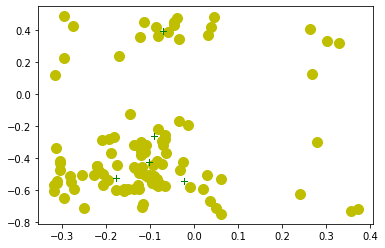

In [38]:
plt.plot(Z_points[1],Z_points[2],'yo',ms=10)
plt.plot(FS03_beacon[4],FS03_beacon[5],'g+')



In [48]:
def get_rear_distance_from_beacon(rears, beacon):
    dist=[]
    for i in range(9):
        dist.append(math.sqrt((rears[1][0+i] - beacon[4][1+i])**2 + (rears[2][0+i] - beacon[5][1+i])**2))

    return dist 
get_rear_distance_from_beacon(Z_points,FS03_beacon)

[0.054686372512113925,
 0.07090674517663637,
 0.4032691305294873,
 0.08690635853454691,
 0.054712324433537934,
 0.039090946712403894,
 0.10536484623121414,
 0.16137573076864206,
 0.07523587011140784]

(array([5., 2., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([0.03909095, 0.07550877, 0.11192658, 0.1483444 , 0.18476222,
        0.22118004, 0.25759786, 0.29401568, 0.33043349, 0.36685131,
        0.40326913]),
 <a list of 10 Patch objects>)

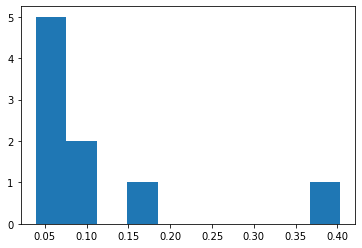

In [50]:
plt.hist(get_rear_distance_from_beacon(Z_points,FS03_beacon),)

### Maybe need to make a matching data frame first - 

(array([63., 17.,  8.,  4.,  2.,  1.,  1.,  3.,  1.,  2.]),
 array([0.01336182, 0.13173344, 0.25010506, 0.36847669, 0.48684831,
        0.60521993, 0.72359155, 0.84196318, 0.9603348 , 1.07870642,
        1.19707804]),
 <a list of 10 Patch objects>)

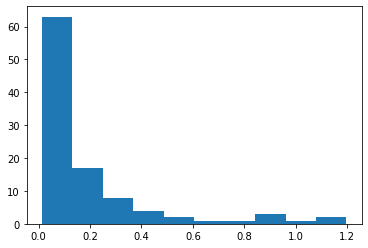

In [166]:
def get_rear_distance_from_beacon(df_rears_corrected):
    dist=[]
    for row in df_rears_corrected.iterrows():
        #print(row[1][1])
        #print(row[1][4])
        #print(row[1][2])
        #print(row[1][5])
        dist.append(math.sqrt((row[1][1] - row[1][4])**2 + (row[1][2] - row[1][5])**2))

    return dist 
plt.hist(get_rear_distance_from_beacon(df_rears_corrected))

### Histogram for only invisible 

(array([3., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.07109194, 0.17506591, 0.27903988, 0.38301385, 0.48698782,
        0.59096179, 0.69493576, 0.79890973, 0.90288369, 1.00685766,
        1.11083163]),
 <a list of 10 Patch objects>)

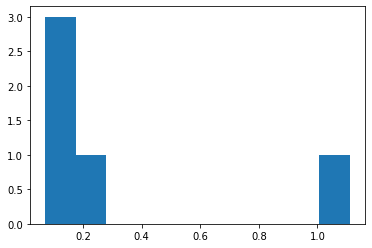

In [204]:
plt.hist(get_rear_distance_from_beacon(df_rears_corrected.loc[df_rears_corrected[6]==2]))

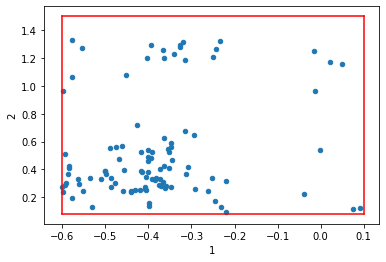

areas: -0.9939999999999999


In [11]:
cut=0
#rotation_correction_points(Z_points)
Z_points.plot.scatter(x=1, y=2)
#plt.plot(rot_position_data[1],rot_position_data[3])
plt.plot([(X_cut_min+cut),(X_cut_max-cut)],[(Y_cut_max-cut),(Y_cut_max-cut)] ,'r-')
plt.plot([(X_cut_min+cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
plt.plot([(X_cut_max-cut),(X_cut_max-cut)],[(Y_cut_min+cut),(Y_cut_max-cut)] ,'r-')
plt.plot([(X_cut_max-cut),(X_cut_min+cut)],[(Y_cut_min+cut),(Y_cut_min+cut)] ,'r-')
plt.plot()
plt.savefig('%srears_cut.png' %(figures), dpi = 200) 
plt.show()
print ('areas: %s' %((X_cut_min-X_cut_max)*(Y_cut_max-Y_cut_min))) 

# GRAVEYARD`

## Try to catch so that it is the smallest value int the beacon 

In [ ]:
df_rears = Z_points
Xs=[]
Ys=[]
for row in Z_points.iterrows():
    #print(row[1][0])

    k = FS03_beacon.iloc[(FS03_beacon[0] - row[1][0]).abs().argsort()[:1]]
    #print(k.values[0][4])
    

    timept = k.values[0][0]
    while timept > row[1][0] and k.index>0:
        
        timept = k.values[0][0]
        k_idx = k.index
        k = FS03_beacon.iloc[k_idx-1] 
        
    Xs.append(k.values[0][4])
    Ys.append(k.values[0][5])


    #print(FS03_position[0][list(k.index)])
    #pos_index.append(int(''.join(map(str,list(k.index)))))
df_rears[4]=Xs
df_rears[5]=Ys
#df_rears